<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This is supplemental practice you can finish to get more familliar with K-Means (ie: not required).  This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [56]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()
df = df[["Pu239", "Pu240"]]

###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


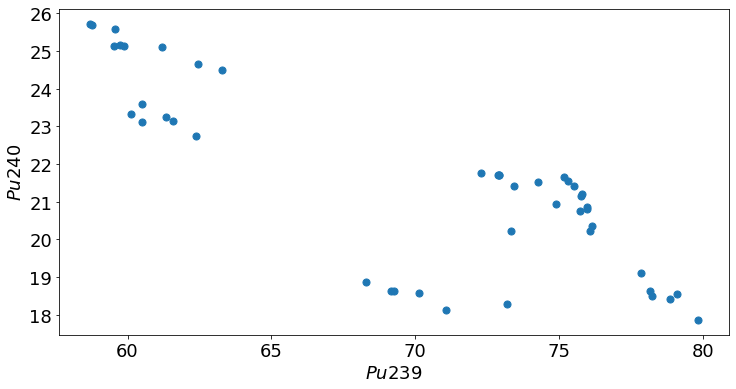

In [57]:
# A:
ax = df.plot(kind="scatter", x="Pu239", y="Pu240", figsize=(12,6), s=50)
plt.xlabel("$Pu239$", fontsize=18)
plt.ylabel("$Pu240$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [58]:
X = df[["Pu239", "Pu240"]]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [59]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [60]:
km.cluster_centers_

array([[-1.31858916,  1.19688286],
       [ 0.63767668, -1.2653207 ],
       [ 0.67370652, -0.15385525]])

In [61]:
km.labels_

array([2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       0], dtype=int32)

In [62]:
km.predict(X_sc)

array([2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       0], dtype=int32)

### Assign clusters assignments (predictions) back to the original dataframe

In [63]:
# A: 
df['cluster'] = km.labels_
df.head()

,Pu239,Pu240,cluster
0,75.804,21.204,2
1,75.515,21.408,2
2,75.175,21.668,2
3,78.872,18.428,1
4,73.317,20.223,2


In [64]:
df.groupby("cluster").agg(["mean"])

,Pu239,Pu240
,mean,mean
cluster,,
0,60.633933,24.387533
1,74.432583,18.516250
2,74.686722,21.166611


In [118]:
sc.inverse_transform(km.cluster_centers_)


array([[60.63393333, 24.38753333],
       [74.43258333, 18.51625   ],
       [74.68672222, 21.16661111]])

### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

In [66]:
# A:
## Create a dataframe for cluster_centers (centroids)
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=["Pu239_C", "Pu240_C"]
)
centroids

,Pu239_C,Pu240_C
0,60.633933,24.387533
1,74.432583,18.516250
2,74.686722,21.166611


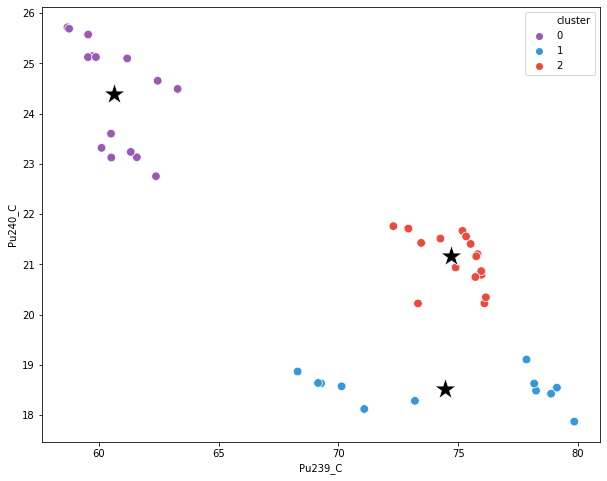

In [106]:
import seaborn as sns
plt.figure(figsize=(10 , 8));
flatui = ["#9b59b6", "#3498db", "#e74c3c",]

## Plot scatter by cluster / color, and centroids
# colors = ["red", "green", "blue"]
# df['color'] = df['cluster'].map(lambda p: colors[p]);

ax = sns.scatterplot(data=df, 
    x="Pu239", y="Pu240", hue="cluster", palette=flatui, s=75);

ax = sns.scatterplot(data=centroids, 
    x="Pu239_C", y="Pu240_C", marker="*", s=500, color="k",


);

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [129]:
# A:
km_2 = KMeans(n_clusters=3, random_state=42)
km_2.fit(X)
km_2.cluster_centers_
km_2.labels_
km_2.predict(X)
df['cluster'] = km_2.labels_
df.head()
hello = df.groupby("cluster").mean()
hello

,Pu239,Pu240
cluster,,
0,60.633933,24.387533
1,71.573167,19.973917
2,76.593000,20.194833


In [134]:
centroids_2 =(hello)
centroids_2

,Pu239,Pu240
cluster,,
0,60.633933,24.387533
1,71.573167,19.973917
2,76.593000,20.194833


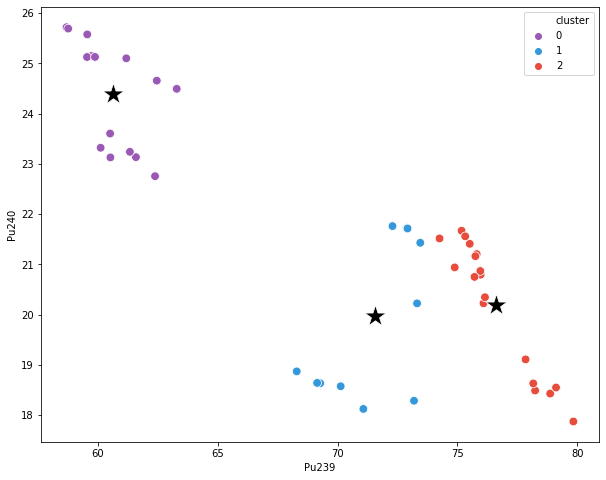

In [136]:
import seaborn as sns
plt.figure(figsize=(10 , 8));
flatui = ["#9b59b6", "#3498db", "#e74c3c",]

## Plot scatter by cluster / color, and centroids
# colors = ["red", "green", "blue"]
# df['color'] = df['cluster'].map(lambda p: colors[p]);

ax = sns.scatterplot(data=df, 
    x="Pu239", y="Pu240", hue="cluster", palette=flatui, s=75);

ax = sns.scatterplot(data=centroids_2, 
    x="Pu239", y="Pu240", marker="*", s=500, color="k",


);

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [68]:
# A: 
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [69]:
score_df.head()

,k,inertia,silhouette
0,2,18.647866,0.705701
1,3,9.743960,0.633217
2,4,5.391655,0.719628
3,5,2.856776,0.686108
4,6,1.990110,0.601648


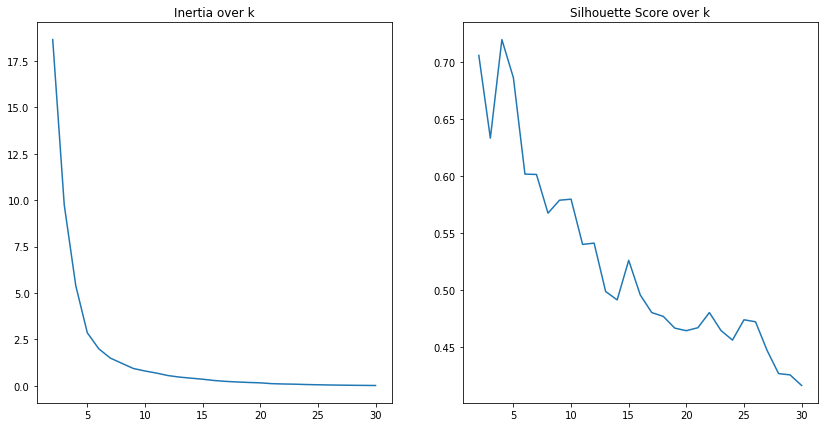

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k');